<a href="https://colab.research.google.com/github/ashupednekar/StyleEncrypt/blob/master/Style_Encryption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from PIL import Image, ImageDraw, ImageFont
from random import randint as ri
from matplotlib import pyplot as plt

In [ ]:
#downloading fonts
!mkdir fonts
%cd fonts
!wget https://noto-website-2.storage.googleapis.com/pkgs/Noto-unhinted.zip
!unzip Noto-unhinted.zip
%cd ..

mkdir: cannot create directory ‘fonts’: File exists
/content/fonts
--2020-09-12 13:23:36--  https://noto-website-2.storage.googleapis.com/pkgs/Noto-unhinted.zip
Resolving noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)... 173.194.215.128, 2607:f8b0:400c:c0c::80
Connecting to noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)|173.194.215.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1114561068 (1.0G) [application/zip]
Saving to: ‘Noto-unhinted.zip’

Noto-unhinted.zip   100%[===================>]   1.04G   207MB/s    in 5.0s    

2020-09-12 13:23:41 (213 MB/s) - ‘Noto-unhinted.zip’ saved [1114561068/1114561068]

Archive:  Noto-unhinted.zip
  inflating: LICENSE_OFL.txt         
replace NotoColorEmoji.ttf? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: NotoColorEmoji.ttf      
  inflating: NotoEmoji-Regular.ttf   
  inflating: NotoKufiArabic-Bold.ttf  
  inflating: NotoKufiArabic-Regular.ttf  
  

In [ ]:
import os
from random import choice

color_mode = 'white' # or random

def create_image_for_text(text, font):
    """Creating content image for a given input"""
    if color_mode == 'random':
        #Creating background with random color
        img = Image.new('RGB', (2048, 512), color = (ri(0,255), ri(0,255), ri(0,255)))
    else:
        #Creating background with random color
        img = Image.new('RGB', (2048, 512), color = (255, 255, 255))
    plt.figure()
    plt.imshow(img)
    fnt = ImageFont.truetype(font, 400)
    d = ImageDraw.Draw(img)
    d.text((0,0), text, font=fnt, fill=(ri(0,255), ri(0,255), ri(0,255)))
    plt.imshow(img)
    img.save('_'.join(text.split(' ')) + '.jpg')
    return '_'.join(text.split(' ')) + '.jpg'

In [ ]:
!pip install pycryptodome

In [ ]:
"""AES"""
from Crypto.Cipher import AES
from Crypto import Random

key = Random.new().read(AES.block_size)
iv = Random.new().read(AES.block_size)

class ImageEncryptor:

    def encrypt(self, path):
        input_file = open(path, 'rb')
        self.path = path
        input_data = input_file.read()
        input_file.close()
        cfb_cipher = AES.new(key, AES.MODE_CFB, iv)
        enc_data = cfb_cipher.encrypt(input_data)
        return enc_data

    def decrypt(self, enc):
        cfb_decipher = AES.new(key, AES.MODE_CFB, iv)
        plain_data = cfb_decipher.decrypt(enc)
        output_file = open(self.path, "wb")
        output_file.write(plain_data)
        output_file.close()

/content/fonts/NotoSerif-CondensedThinItalic.ttf


NameError: ignored

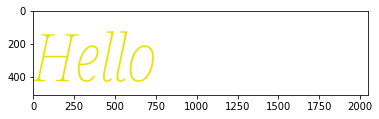

In [ ]:
fontface = '/content/fonts/' + choice(os.listdir('/content/fonts/'))
print(fontface)
test_img_path = create_image_for_text('Hello', fontface)

img_encryptor.decrypt(enc)
plt.imshow(Image.open(test_img_path))

img_encryptor = ImageEncryptor()
enc = img_encryptor.encrypt(test_img_path)
print(enc)
os.system('rm '+test_img_path)